<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/Series%20de%20Fourier/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Fourier

Ya hemos visto el significado físico de las series de Fourier y su relación con las componentes sinusoidales/cosenoidales de una señal determinada.

Uno de los ejemplos más importantes de señales periódicas en nuestra vida diaria es el sonido. El sonido son tan solo ondas de presión producidas por una perturbación que viaja por el aire. Estas perturbaciones pueden ser la voz, o un instrumento musical.

Recuerde que en clases anteriores vimos cómo modelar la vibración de una cuerda, lo cual forma la base fundamental del funcionamiento de instrumentos musicales. El siguiente ejercicio está inspirado en este fenómeno.

## Ejercicio 1

Considere el problema de la simulación de una cuerda tensa de un piano con las siguientes características:

Una cuerda de un piano de longitud $L$ inicialmente en roposo. En $t=0$ la cuerda es golpeada por un martillo a una distancia $x_0$ de uno de los extremos de la cuerda. La cuerda vibra como resultado del golpe, excepto los puntos $x = 0$ y $x = L$ que se mantienen fijos.

Como resultado del golpe del martillo se genera un pulso con un perfil inicial $y_0(x)= \exp(-k(x-x_0)^2)$. Utilice el método explícito para simular la propagación de la onda resultante usando $x_0 = 0.5$, $k = 1000 m^{-2}$ y $v = 300m/s$.

Ahora considere un punto cualquiera de esa cuerda y guarde la información del desplazamiento $y(t)$ de ese punto. Calcule el PSD para esta señal.  Utilice el módulo IPython.display.Audio para escuchar la señal que registró

Text(0, 0.5, 'Desplazamiento')

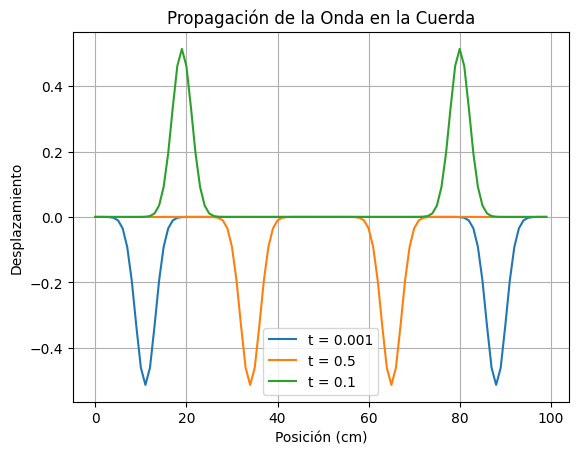

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio
# Parámetros
L = 1  # longitud de la cuerda en metros
x0 = 0.5  # posición del golpe del martillo
k = 1000 # parámetro del perfil inicial
v = 300 # velocidad de propagación de la onda
T = 0.01  # tiempo total de la simulación en segundos  # paso espacial
N=100
a = L/N
h = a/v  # paso temporal
r = h*v/a
x = np.linspace(0,L,N) #posiciones a lo largo de la cuerda.

# Definimos las condiciones iniciales
phi_t = np.exp(-k*(x-x0)**2)
phi_tmenosh = np.copy(phi_t)
phi_tmash = np.zeros(N)

epsilon = h/10000
punto_interes_cuerda = 0.3
indice_punto_interes = int(punto_interes_cuerda / a )
t = 0
t_final = 0.5
y_vec = np.zeros(int(0.5/h)+1) #almacenar el desplazamiento en el punto de interés
cont = 0

while t <= t_final:
  for i in range(1,N-1):
    phi_tmash[i] = 2*(1-r**2)*phi_t[i] - phi_tmenosh[i] + r**2*(phi_t[i+1] + phi_t[i-1])

  phi_tmenosh = np.copy(phi_t)
  phi_t = np.copy(phi_tmash)
  t+=h
  if (abs(t-0.002)<epsilon):
    plt.plot(phi_t)
  if (abs(t-0.05)<epsilon):
    plt.plot(phi_t)
  if (abs(t-0.1)<epsilon):
    plt.plot(phi_t)
# Registro del desplazamiento en x = 0.3 metros
  y = phi_tmash[indice_punto_interes]
  y_vec[cont] = y
  cont += 1

plt.title(('Propagación de la Onda en la Cuerda'))
plt.legend(['t = 0.001','t = 0.5','t = 0.1'])
plt.grid()
plt.xlabel('Posición (cm)')
plt.ylabel('Desplazamiento')

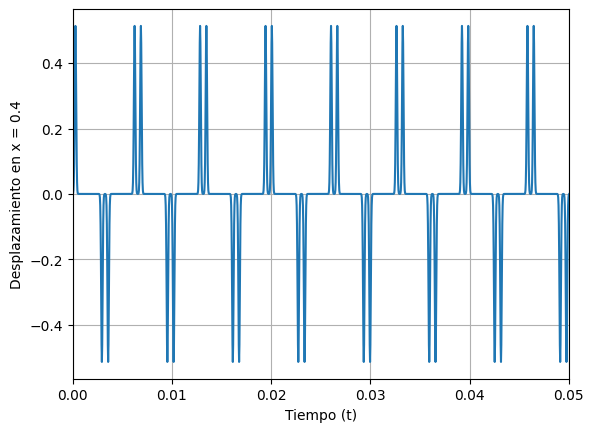

In [ ]:
#desplazamiento en x = 0.3 metros a lo largo del tiempo
t = np.linspace(0,0.5,len(y_vec))
plt.grid()
plt.plot(t,y_vec)
plt.ylabel('Desplazamiento en x = 0.3')
plt.xlabel('Tiempo (t)')
plt.xlim(0,0.05)
plt.show()

In [ ]:
Audio(y_vec,rate = 1/h)

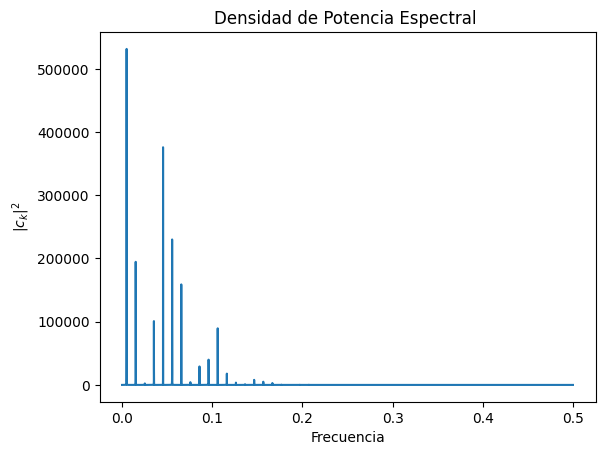

In [ ]:
# Análisis de densidad espectral de potencia (PSD)
c = np.fft.fft(y_vec)
N = len(y_vec)
freq = np.fft.fftfreq(N, d = 1)
plt.plot(freq[0:N//2],np.abs(c[0:N//2])**2)
plt.xlabel('Frecuencia')
plt.ylabel(r'$|c_k|^2$')
plt.title('Densidad de Potencia Espectral ')
plt.show()


Repita el ejercicio anterior, pero ahora considerando $x_0 = 0.4$. Compare el PSD en este caso, qué puede decir de este espectro en relación con el anterior?

Text(0, 0.5, 'Desplazamiento')

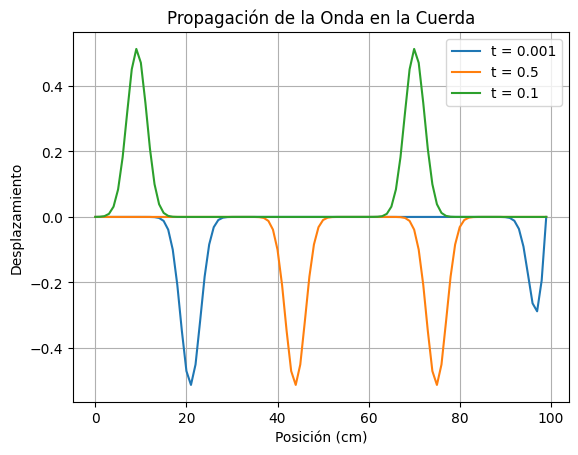

In [ ]:
L = 1  # longitud de la cuerda en metros
x0 = 0.4  # posición del golpe del martillo
k = 1000 # parámetro del perfil inicial
v = 300 # velocidad de propagación de la onda
T = 0.01  # tiempo total de la simulación en segundos  # paso espacial
N=100
a = L/N
h = a/v  # paso temporal
r = h*v/a
x = np.linspace(0,L,N) #posiciones a lo largo de la cuerda.

# Definimos las condiciones iniciales
phi_t = np.exp(-k*(x-x0)**2)
phi_tmenosh = np.copy(phi_t)
phi_tmash = np.zeros(N)

epsilon = h/10000
punto_interes_cuerda = 0.3
indice_punto_interes = int(punto_interes_cuerda / a )
t = 0
t_final = 0.5
y_vec = np.zeros(int(0.5/h)+1) #almacenar el desplazamiento en el punto de interés
cont = 0

while t <= t_final:
  for i in range(1,N-1):
    phi_tmash[i] = 2*(1-r**2)*phi_t[i] - phi_tmenosh[i] + r**2*(phi_t[i+1] + phi_t[i-1])

  phi_tmenosh = np.copy(phi_t)
  phi_t = np.copy(phi_tmash)
  t+=h
  if (abs(t-0.002)<epsilon):
    plt.plot(phi_t)
  if (abs(t-0.05)<epsilon):
    plt.plot(phi_t)
  if (abs(t-0.1)<epsilon):
    plt.plot(phi_t)
# Registro del desplazamiento en x = 0.3 metros
  y = phi_tmash[indice_punto_interes]
  y_vec[cont] = y
  cont += 1

plt.title(('Propagación de la Onda en la Cuerda'))
plt.legend(['t = 0.001','t = 0.5','t = 0.1'])
plt.grid()
plt.xlabel('Posición (cm)')
plt.ylabel('Desplazamiento')

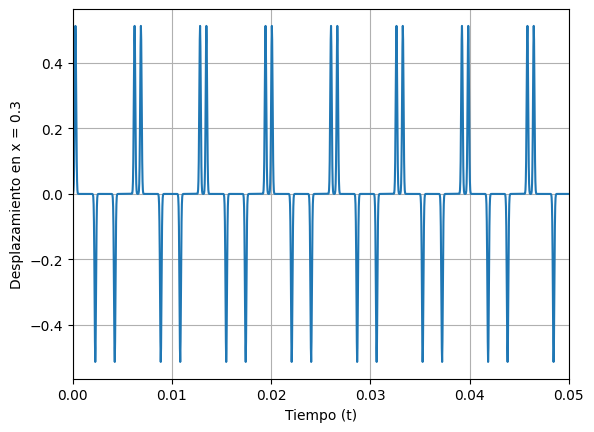

In [ ]:
#desplazamiento en x = 0.3 metros a lo largo del tiempo
t = np.linspace(0,0.5,len(y_vec))
plt.grid()
plt.plot(t,y_vec)
plt.ylabel('Desplazamiento en x = 0.3')
plt.xlabel('Tiempo (t)')
plt.xlim(0,0.05)
plt.show()

In [ ]:
Audio(y_vec,rate = 1/h)

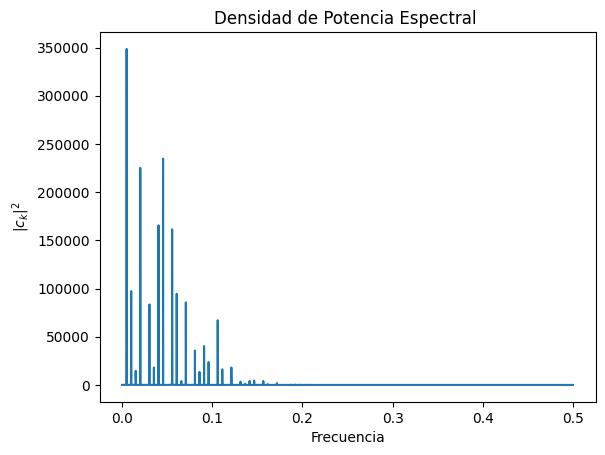

In [ ]:
# Análisis de densidad de potencia espectral  (PSD)
c = np.fft.fft(y_vec)
N = len(y_vec)
freq = np.fft.fftfreq(N, d = 1)
plt.plot(freq[0:N//2],np.abs(c[0:N//2])**2)
plt.xlabel('Frecuencia')
plt.ylabel(r'$|c_k|^2$')
plt.title('Densidad de Potencia Espectral ')
plt.show()

#Conclusión:
se observa que cuando la cuerda se golpea en x0 = 0.5, la energía se concentra más en las primeras frecuencias, mostrando picos bien definidos, lo que indica un predominio de las frecuencias fundamentales. En cambio, cuando la cuerda se golpea en x0=0.4, aunque sigue habiendo picos en las bajas frecuencias, estos se distribuyen más ampliamente. Esto sugiere que la posición del golpe afecta la distribución de las frecuencias dominantes en el espectro.


Realice una gráfica de la frecuencia fundamental en función de la velocidad de propagación de la onda en la cuerda. Como suena la señal cuando la velocidad es de 600m/s?

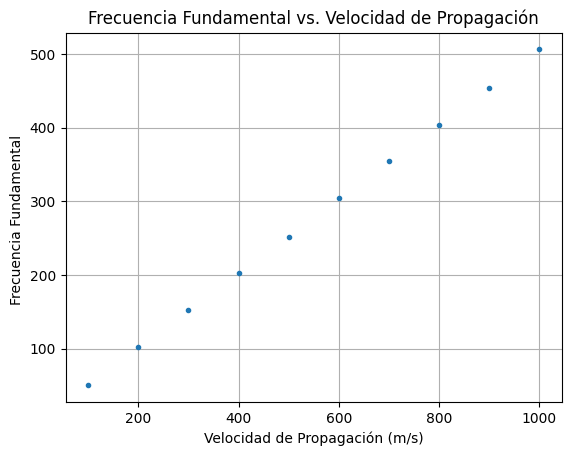

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parámetros iniciales
L = 1  # Longitud de la cuerda (m)
vel = np.linspace(100, 1000, 10)  # Velocidades de propagación en m/s
N = 100
a = L / N
x0 = 0.5
k = 1000
x = np.linspace(0, L, N)

Frecuencias = np.zeros(len(vel))  # Arreglo para almacenar las frecuencias fundamentales

# Simulación y análisis para diferentes velocidades
for k in range(len(vel)):
    t = 0
    cont = 0
    phi_t = np.exp(-k*(x-x0)**2)
    phi_tmenosh = np.copy(phi_t)
    phi_tmash = np.zeros(N)
    v = vel[k]
    h = a / v  # Tamaño del paso temporal
    r = h * v / a
    y_vec = np.zeros(int(0.5 / h) + 1)  #almacenar el desplazamiento en el tiempo

    # Simulación de la evolución de la onda
    while t <= t_final:
      for i in range(1,N-1):
        phi_tmash[i] = 2*(1-r**2)*phi_t[i] - phi_tmenosh[i] + r**2*(phi_t[i+1] + phi_t[i-1])
      phi_tmenosh = np.copy(phi_t)
      phi_t = np.copy(phi_tmash)
      t+=h
      y_vec[cont] = phi_tmash[40]  # Desplazamiento en x = 0.4 metros
      cont += 1

        # Análisis de la frecuencia fundamental
    c = np.abs(np.fft.fft(y_vec))**2  # Densidad espectral de potencia
    idMax = np.argmax(c)  # Índice de la frecuencia máxima
    freq = np.fft.fftfreq(len(y_vec), d=h)  # Frecuencias correspondientes
    fun_freq = np.abs(freq[idMax])  # Frecuencia fundamental
    Frecuencias[k] = fun_freq  # Almacena la frecuencia fundamental

# Graficar la frecuencia fundamental vs. velocidad de propagación
plt.plot(vel, Frecuencias, '.')
plt.xlabel('Velocidad de Propagación (m/s)')
plt.ylabel('Frecuencia Fundamental ')
plt.title('Frecuencia Fundamental vs. Velocidad de Propagación')
plt.grid()
plt.show()

# Análisis de la señal para velocidad de 600 m/s
velocidad = 600
h = a / velocidad
r = h * velocidad / a
y_vec_600 = np.zeros(int(0.5 / h) + 1)
t = 0
cont = 0
phi_t = np.exp(-k*(x-x0)**2)
phi_tmenosh = np.copy(phi_t)
phi_tmash = np.zeros(N)

while t <= 0.5:
    for i in range(1, N - 1):
      phi_tmash[i] = 2*(1-r**2)*phi_t[i] - phi_tmenosh[i] + r**2*(phi_t[i+1] + phi_t[i-1])
    phi_tmenosh = np.copy(phi_t)
    phi_t = np.copy(phi_tmash)
    t += h
    y_vec_600[cont] = phi_tmash [40]
    cont += 1

# Reproducir el sonido de la señal para velocidad de 600 m/s
Audio(y_vec_600, rate=1 / h)
